# Principal Component Analysis 
Agenda today:
- dimensionality reduction: motivation for PCA & intuition for PCA
- Construct Principal Components using singular value decomposition and interpret them 
- Example implementation in Python

## Part I. Motivation and Intuition for PCA
We can easily visualize data with two or three dimensions, but as the dimensions of our data increase, making sense of our data through visualization becomes challenging. One of such solution is pairplots:
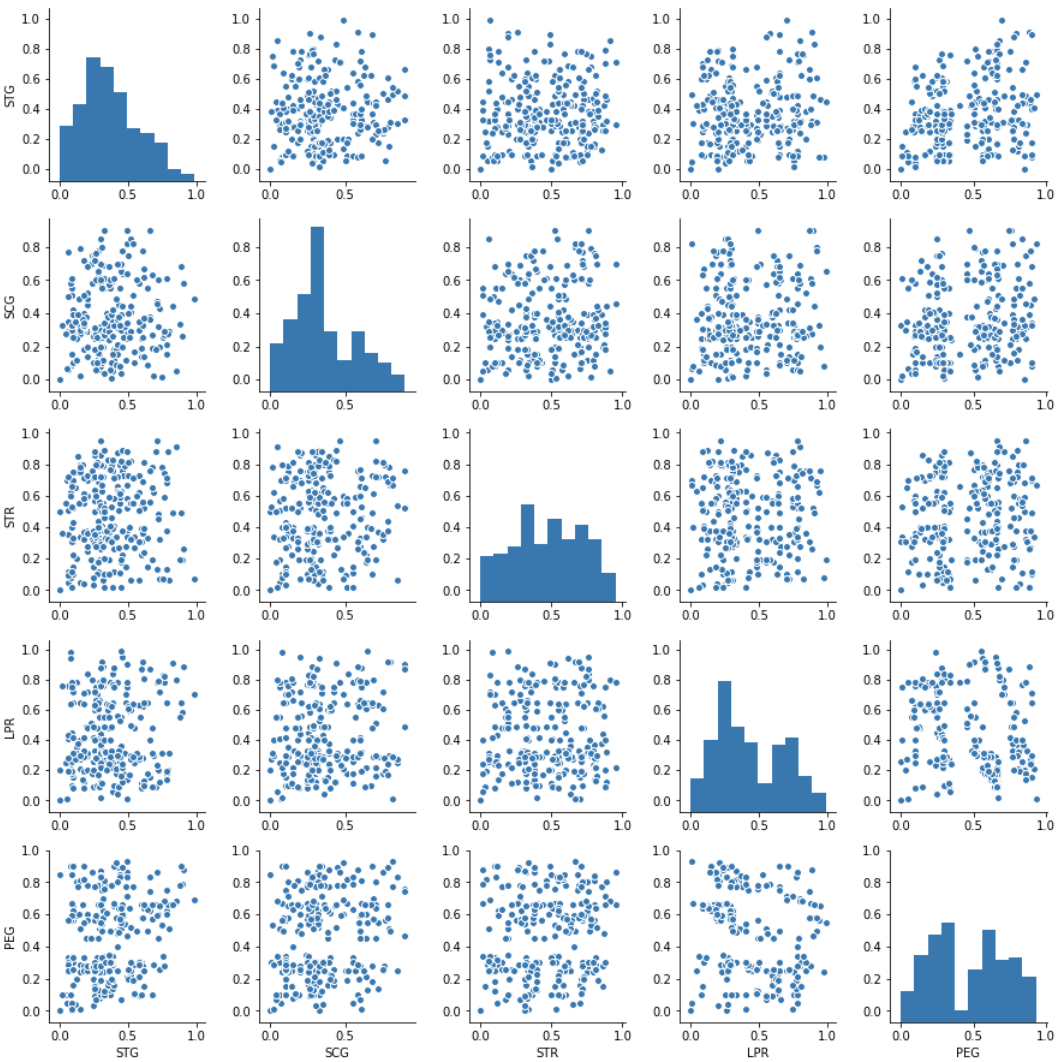

Pairplots are a great way of visualizing the pairwise correlations between variables, so are heatmaps. However, as the dimensions increase to hundreds or even thousands, using pairplots or heatmap might not be suitable anymore. In addition, pairplots and heatmap only show pairwise correlations between variables, but not linear combinations of variables. Therefore, an algorithm that perform dimensionality reduction is needed. 

## Part II. Constructing PCA

#### What is PCA?
PCA is a method to summarize our data -- it essentially construct new characteristics from the original dataset and summarize our original variables. In other words, unlike other dimensionality reduction algorithm that retain or select the original features, PCA linearly transform the original variables. PCA extracts our features and output principal components that are linear combinations of the original variables by projecting the original variables to lower dimensions in such a way that it captures the variability of the data. PCA would not discard any information or any variables, and it is up to us to select the features we want to include in our model. PCA outputs $p$ principal components where $p$ equals the number of features we have in our dataset. 

#### What is principal components?
The principal components are linear combination of the original variables. The first principal component represents the combination of variables that explain the most amount of variances in the data, and the second component explains the second most amount of variance in the data, and so on. For example, 
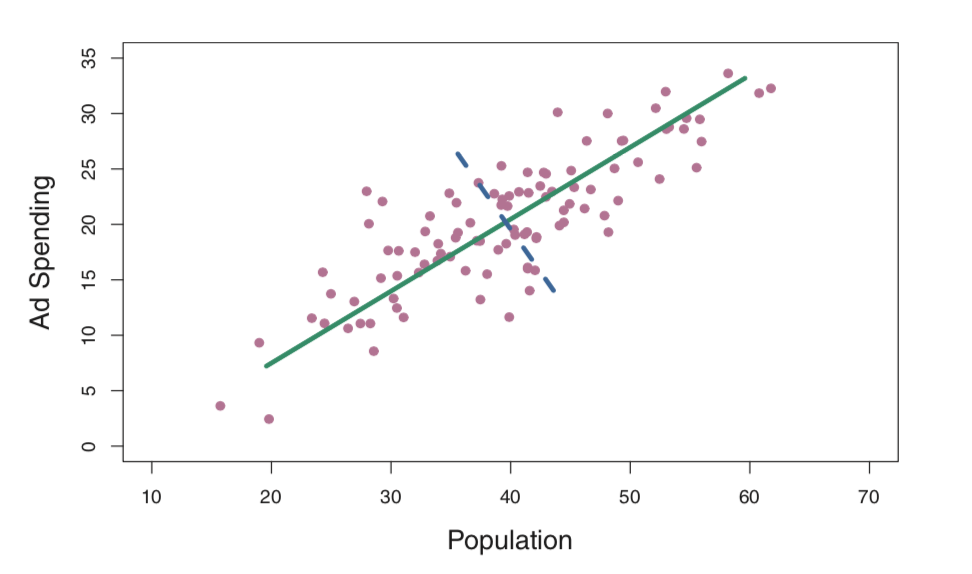


#### PCA Step-by-step
1. It is important to **center** and standardize your data. PCA lives off of correlation and covariance of your data, and using wildly different scales could lead to inflated weights for the linear combination. Let's call this centered and standardized matrix **Z**. 
2. Calculate a covariance matrix of p x p where p responds to number of predictors. 
3. Calculate the eigenvectors and eigenvalues of the covariance matrix. 
4. Arrange the eigenvalues from largest to smallest. You should obtain p eigenvalues which correspond to number of components. 
5. Choose the amount of components you want to include based on number of variance explained.

#### PCA Terminology 
- Eigenvectors 
    - Eigenvectors are the direction of the unit scaled vector in the p-dimensional space for the principal components. 
- Eigenvalues
    - Eigenvalues are the magnitude of the variation in each of the components, denoted as $\lambda$
- Loadings
    - Shall not be confused with eigenvectors
    - $Loadings=Eigenvectors⋅\sqrt{Eigenvalues}$
    - loadings are the covariances/correlations between the original variables and the unit-scaled components
    - Properties of Loadings:
        - Their sums of squares within each component are the eigenvalues (components' variances).
        - Loadings are coefficients in linear combination predicting a variable by the (standardized) components.
- Singular Values
    - $\sqrt {Eigenvector}$

## Part III. PCA Example
In this example, we want to examine how to reduce the dimensionality of the diamonds dataset, and which features produce the highest variability in our dataset. Let's find out!

In [27]:
import numpy as np

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('mpg')
df.head()
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [29]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [30]:
df.dropna(axis = 0, inplace = True)

In [31]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [49]:
features = ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration']

In [50]:
# preprocess the data 
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['mpg']].values

In [51]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [52]:
# create principal components 
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2',
                                                                 'principal component 3','principal component 4',
                                                                 'principal component 5'])

In [53]:
pca.explained_variance_ratio_

array([0.81437196, 0.13877225, 0.02669861, 0.01285368, 0.0073035 ])

In [54]:
pca.explained_variance_

array([4.08227378, 0.69563583, 0.13383446, 0.06443276, 0.03661089])

In [55]:
principalDf.iloc[:,:3].head()

,principal component 1,principal component 2,principal component 3
0,2.242403,-0.479758,-0.759174
1,3.035319,-0.599310,-0.219264
2,2.622952,-0.872521,-0.536815
3,2.436430,-0.576210,-0.455281
4,2.493047,-1.024095,-0.695004


In [56]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_
print(eig_values)
print(eig_vectors)

[4.08227378 0.69563583 0.13383446 0.06443276 0.03661089]
[[ 0.46871748  0.4824044   0.47384374  0.46179021 -0.3313787 ]
 [ 0.2234786   0.17862974 -0.11998855  0.34528638  0.8857363 ]
 [-0.65869995 -0.18764042  0.62757104  0.33449699  0.15865624]
 [ 0.27031946  0.02124108  0.59359925 -0.70324388  0.28207124]
 [-0.47265527  0.83649107 -0.12194007 -0.24715772  0.03038708]]


In [58]:
# examine the first pricipal component
eig_vectors[0]

array([ 0.46871748,  0.4824044 ,  0.47384374,  0.46179021, -0.3313787 ])

In [61]:
# examine the components
pc1 = pca.components_[0]
pc2 = pca.components_[1]
# the .components attribute shows principal axes in feature space, representing the directions of maximum variance in the data. 
#The components are sorted by explained_variance_


In [62]:
print(pc1)
print(pc2)

[ 0.46871748  0.4824044   0.47384374  0.46179021 -0.3313787 ]
[ 0.2234786   0.17862974 -0.11998855  0.34528638  0.8857363 ]


In [63]:
# get the loadings
structure_loading_1 = pc1* np.sqrt(eig_values[0])
str_loading_1 = pd.Series(structure_loading_1, index=features)
str_loading_1

cylinders       0.947027
displacement    0.974681
horsepower      0.957384
weight          0.933030
acceleration   -0.669539
dtype: float64

In [44]:
str_loading_1.sort_values(ascending=False)

displacement    0.968623
horsepower      0.957883
cylinders       0.939505
weight          0.921923
model_year     -0.479410
acceleration   -0.670688
dtype: float64

Text(0, 0.5, 'proportion of explained variance')

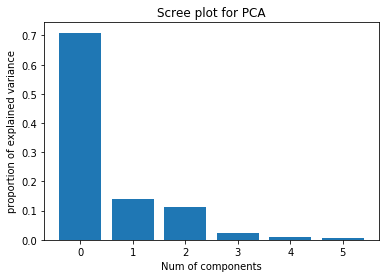

In [46]:
index = np.arange(6)
plt.bar(index, pca.explained_variance_ratio_)
plt.title('Scree plot for PCA')
plt.xlabel('Num of components')
plt.ylabel('proportion of explained variance')

Text(0, 0.5, 'explained variance ratio')

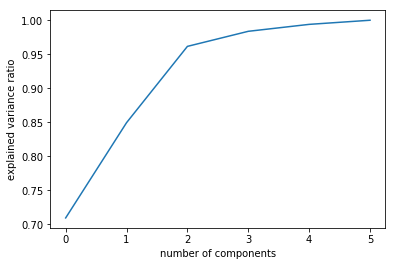

In [47]:
# plotting screeplots 
#print(pca.explained_variance_ratio_)
#print(pca.explained_variance_)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance ratio')

#### Using numpy 

In [82]:
# you can also use numpy to solve for this aa
import numpy as np 
corr_mat = pd.DataFrame(x).corr()
eigenvalues, eigenvectors = np.linalg.eig(corr_mat)

In [92]:
eigenvalues

array([4.7639148 , 1.28586808, 0.69081126, 0.17375333, 0.01239871,
       0.03294659, 0.04030722])

In [68]:
eigenvectors

array([[-0.45244549, -0.03469601, -0.00549481,  0.06835945, -0.42588029,
         0.76815114,  0.13399948],
       [ 0.00091613, -0.73067971,  0.67282929,  0.047248  ,  0.05560026,
         0.01445027, -0.08873829],
       [-0.09951609,  0.67506738,  0.72806947,  0.0595406 ,  0.00204926,
        -0.02526831, -0.01037614],
       [-0.42551927, -0.03525794, -0.10544948,  0.84977817,  0.08281429,
        -0.27330947, -0.05377206],
       [-0.45321251,  0.00351255, -0.03950882, -0.24299509,  0.82865822,
         0.19846061,  0.08898016],
       [-0.4472649 ,  0.00215791, -0.05418879, -0.32846061, -0.20885709,
        -0.21526655, -0.77405793],
       [-0.44595366, -0.08903518,  0.03960344, -0.31700727, -0.27995794,
        -0.4986704 ,  0.60339656]])

### Conclusions
PCA is one of the most versatile algorithm used not only in research in data science but also social sciences, natural sciences and others. It allows us to further examine the relationship between different variables in our dataset, and the importance of each variable. Some of the practical applications of PCA are:
- [Facial Recognition](https://en.wikipedia.org/wiki/Eigenface)
- General purpose dimensionality reduction 
- Clinical psychology -- distinguishing patients with schizophrenia from healthy patients [link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2566788/)
- Data Visualization 